# Introduction

My name is Branden from Data Science Hacktiv8 Batch 05 

This is my Milestone 1 phase 2

# Import Library

In [197]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

In [198]:
df_full = pd.read_csv("./WA_Fn-UseC_-Telco-Customer-Churn.csv")
print(df_full.shape)
df_full.head(5)

(7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [199]:
df = df_full.drop(["customerID"], axis = 1)

# Data Cleaning

In [200]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [201]:
df.isin(["", " "]).sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In the data we can see that Tenure 0 means TotalCharges is empty, that means the customer is in their first month, we can replace the value with 0 

In [202]:
df[df["TotalCharges"].isin([" "])] = 0

Then we change it's type from string to float

In [203]:
df["TotalCharges"] = df["TotalCharges"].astype(float)

# EDA

Define categorical and numerical column

In [204]:
categorical = df.select_dtypes(["object"]).columns.to_list()
numerical = [i for i in df if i not in categorical]

Preview the numeric column in graph

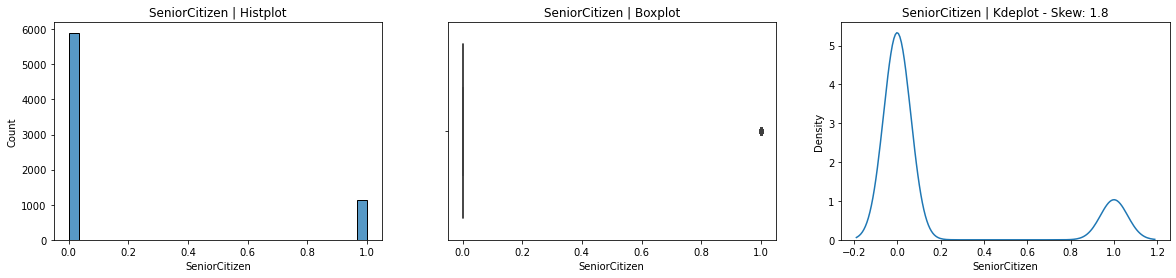

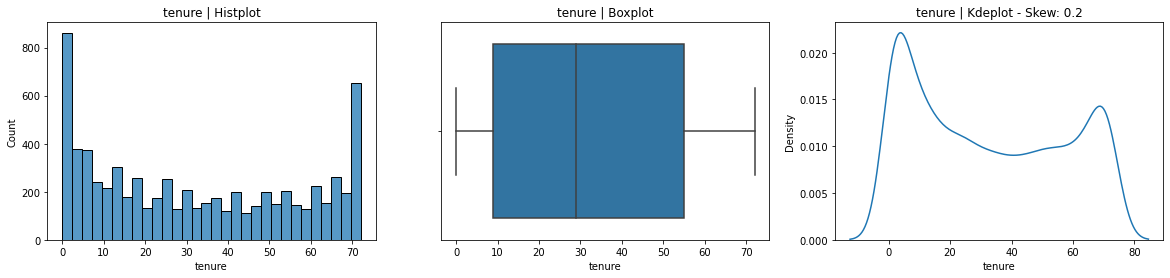

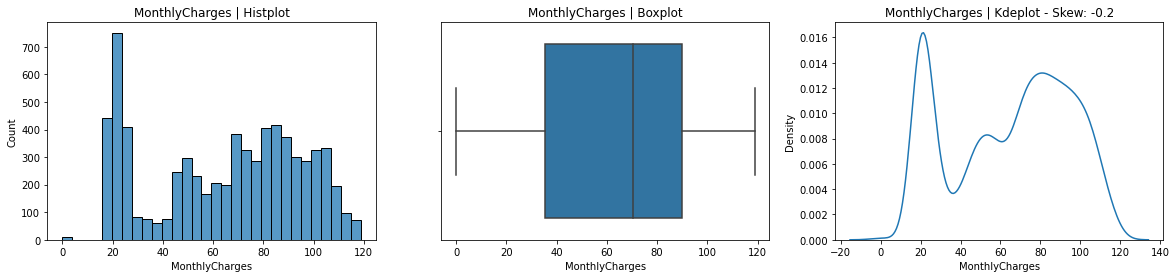

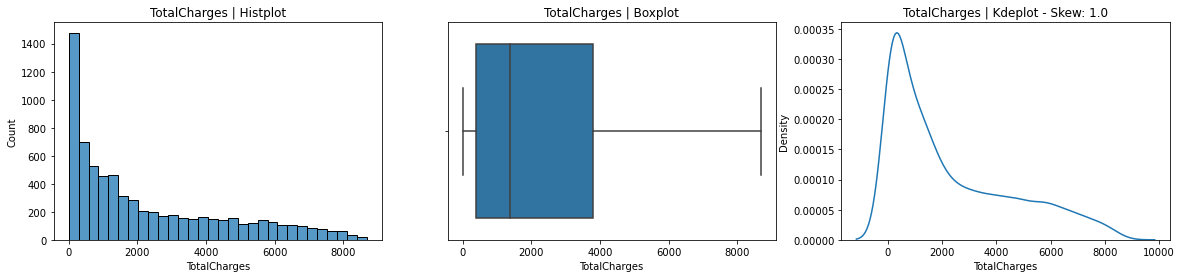

In [205]:
for i in df[numerical].columns:
    fig, ax = plt.subplots(1, 3, figsize=(20,4))
    sns.histplot(x=df[i],ax=ax[0], bins=30)
    sns.boxplot(x=df[i], ax=ax[1])
    sns.kdeplot(df[i], ax=ax[2])
    skew_val=round(df[i].skew(), 1)
    ax[0].set_title(i + " | Histplot")
    ax[1].set_title(i + " | Boxplot")
    ax[2].set_title(i + " | Kdeplot - Skew: "+str(skew_val))
    plt.show()

SenioCitizen seems like a categorical variable and the data on Total Charges is skewed

In [206]:
print(df.Churn.unique())
df = df[df["Churn"] != 0]

['No' 'Yes' 0]


the target data seems filled with error number, but after my observation all column value is 0 so we delete it

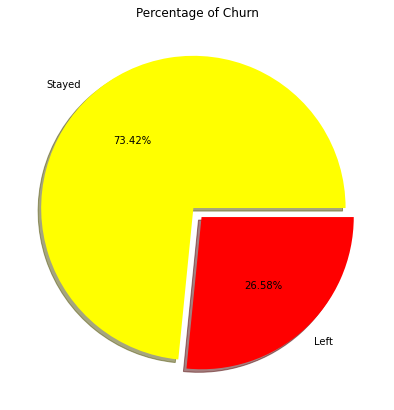

In [207]:
colors = ['yellow', 'red']
labels = ['Stayed', 'Left']
exploded = [0.04,0.04]

plt.figure(figsize = (9,7), facecolor="w")
plt.title('Percentage of Churn')
plt.pie(df.Churn.value_counts(), autopct = "%.2f%%", colors= colors, explode = exploded , shadow= True, labels=labels)
plt.show()

This is the Percentage between Customer who left within last month and Customer who didn't left, the data seems a bit imbalance

In [208]:
print("Categorical column")
for i in categorical:
    print(f"{i}: {df[i].nunique()} {str(df[i].dtype)}")

Categorical column
gender: 2 object
Partner: 2 object
Dependents: 2 object
PhoneService: 2 object
MultipleLines: 3 object
InternetService: 3 object
OnlineSecurity: 3 object
OnlineBackup: 3 object
DeviceProtection: 3 object
TechSupport: 3 object
StreamingTV: 3 object
StreamingMovies: 3 object
Contract: 3 object
PaperlessBilling: 2 object
PaymentMethod: 4 object
Churn: 2 object


from above, seemslike hist plot is good enough

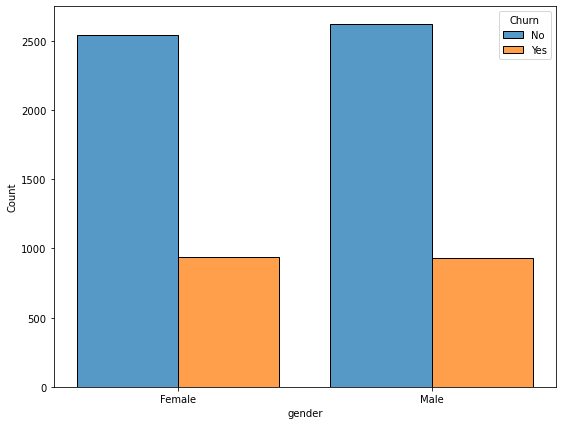

In [209]:
plt.figure(figsize = (9,7), facecolor="w")
sns.histplot(data=df, x="gender", hue="Churn", multiple="dodge", shrink=.8)
plt.show()

Gender Doesn't correlate with our target

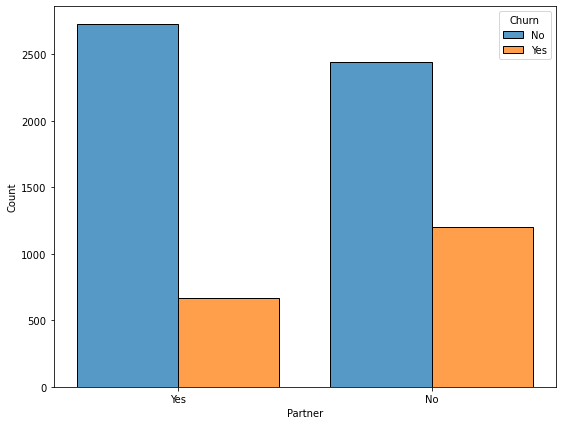

In [210]:
plt.figure(figsize = (9,7), facecolor="w")
sns.histplot(data=df, x="Partner", hue="Churn", multiple="dodge", shrink=.8)
plt.show()

Customer with no partner have more chance to leave

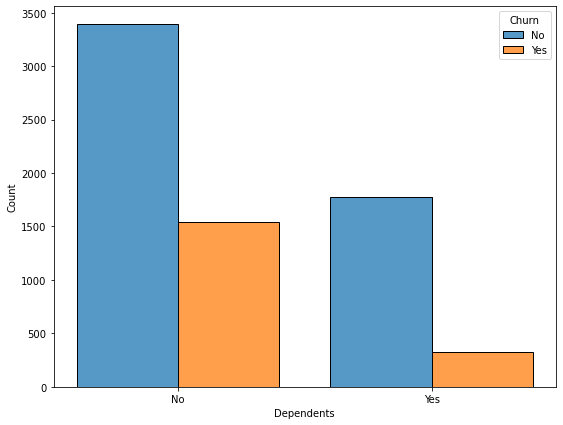

In [211]:

plt.figure(figsize = (9,7), facecolor="w")
sns.histplot(data=df, x="Dependents", hue="Churn", multiple="dodge", shrink=.8)
plt.show()

Those who isn't dependent have more chance to leave 

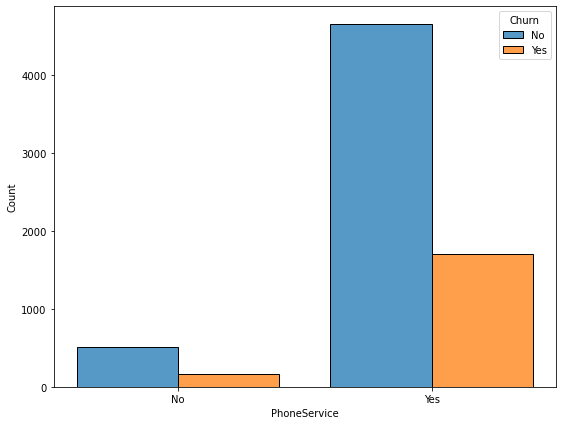

In [212]:
plt.figure(figsize = (9,7), facecolor="w")
sns.histplot(data=df, x="PhoneService", hue="Churn", multiple="dodge", shrink=.8)
plt.show()

Not much we can get from this, beside people usually signed up for phone service

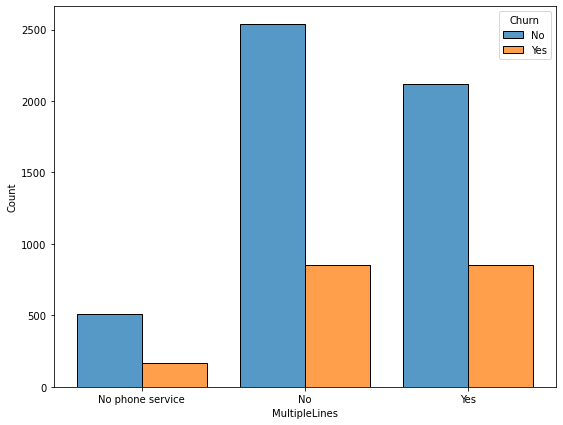

In [213]:
plt.figure(figsize = (9,7), facecolor="w")
sns.histplot(data=df, x="MultipleLines", hue="Churn", multiple="dodge", shrink=.8)
plt.show()

Nothing we can see from here

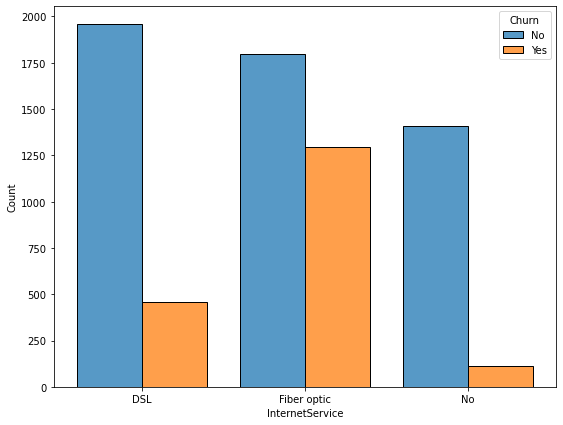

In [214]:
plt.figure(figsize = (9,7), facecolor="w")
sns.histplot(data=df, x="InternetService", hue="Churn", multiple="dodge", shrink=.8)
plt.show()

Those with fiber optic internet service have high chance to leave

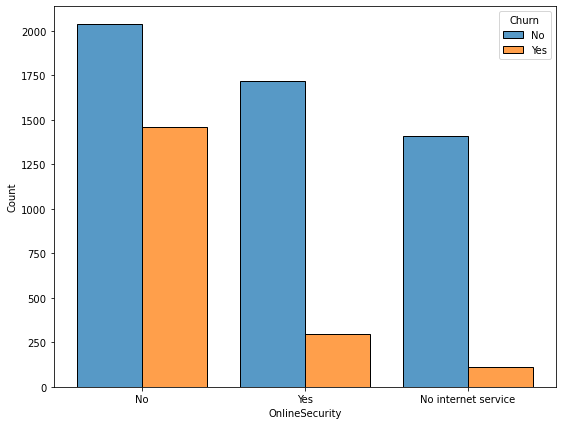

In [215]:
plt.figure(figsize = (9,7), facecolor="w")
sns.histplot(data=df, x="OnlineSecurity", hue="Churn", multiple="dodge", shrink=.8)
plt.show()

Those with No Online Security have higher chance to leave

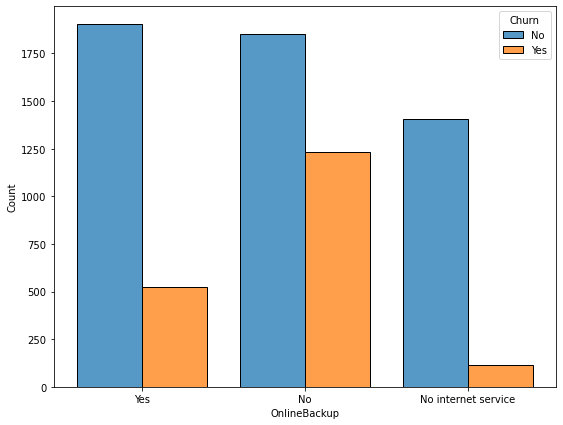

In [216]:
plt.figure(figsize = (9,7), facecolor="w")
sns.histplot(data=df, x="OnlineBackup", hue="Churn", multiple="dodge", shrink=.8)
plt.show()

Those with No Online Backup have higher chance to leave

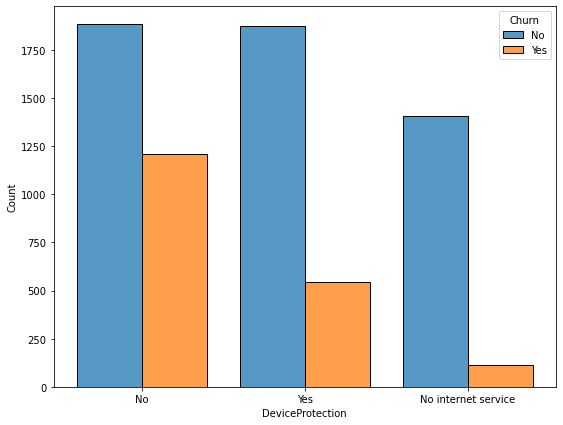

In [217]:
plt.figure(figsize = (9,7), facecolor="w")
sns.histplot(data=df, x="DeviceProtection", hue="Churn", multiple="dodge", shrink=.8)
plt.show()

Those with No Device Protection have higher chance to leave

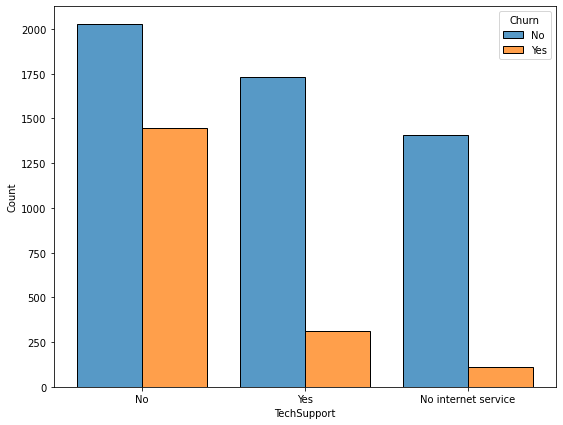

In [218]:
plt.figure(figsize = (9,7), facecolor="w")
sns.histplot(data=df, x="TechSupport", hue="Churn", multiple="dodge", shrink=.8)
plt.show()

Those with No Tech Support have higher chance to leave

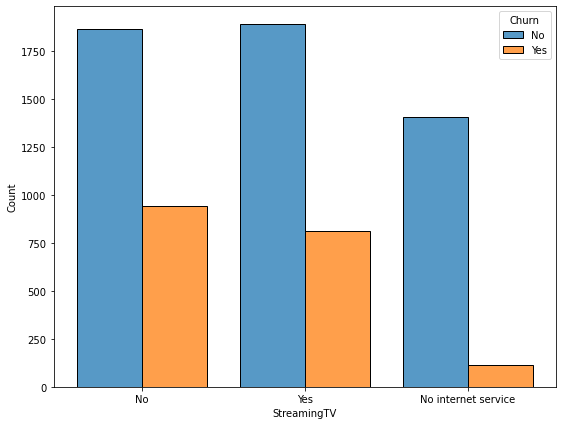

In [219]:
plt.figure(figsize = (9,7), facecolor="w")
sns.histplot(data=df, x="StreamingTV", hue="Churn", multiple="dodge", shrink=.8)
plt.show()

No internet service have less chance to leave

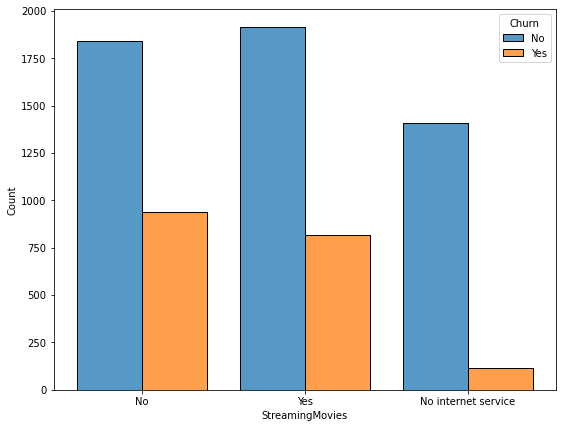

In [220]:
plt.figure(figsize = (9,7), facecolor="w")
sns.histplot(data=df, x="StreamingMovies", hue="Churn", multiple="dodge", shrink=.8)
plt.show()

This Graph is same as above

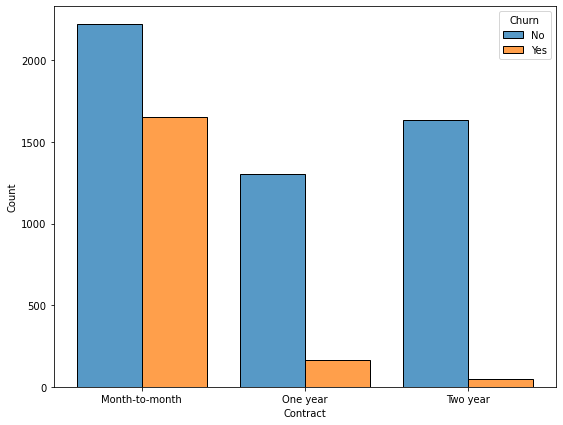

In [221]:
plt.figure(figsize = (9,7), facecolor="w")
sns.histplot(data=df, x="Contract", hue="Churn", multiple="dodge", shrink=.8)
plt.show()

Those with Month to month contract have higher chance to leave

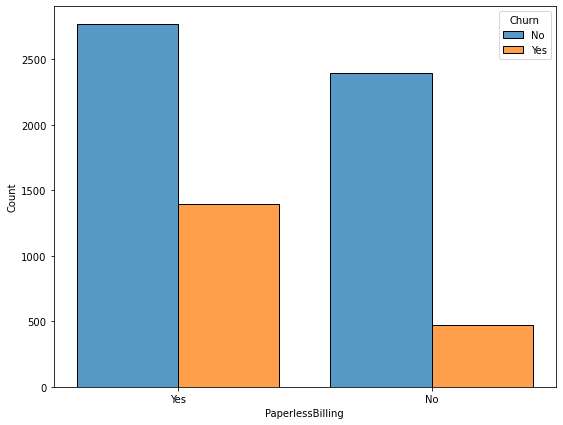

In [222]:
plt.figure(figsize = (9,7), facecolor="w")
sns.histplot(data=df, x="PaperlessBilling", hue="Churn", multiple="dodge", shrink=.8)
plt.show()

Those with Paperless Billing have higher chance to leave

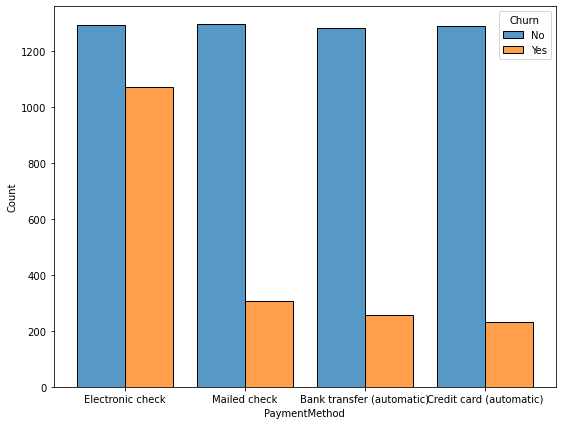

In [223]:
plt.figure(figsize = (9,7), facecolor="w")
sns.histplot(data=df, x="PaymentMethod", hue="Churn", multiple="dodge", shrink=.8)
plt.show()

Those using Electronic check payment method have higher chance to leave

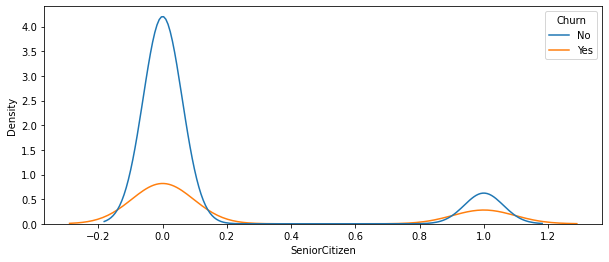

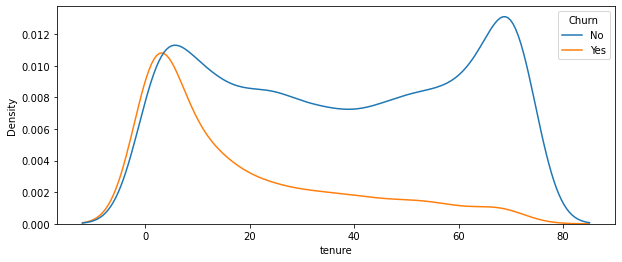

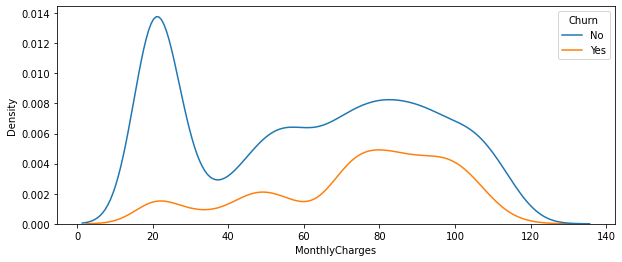

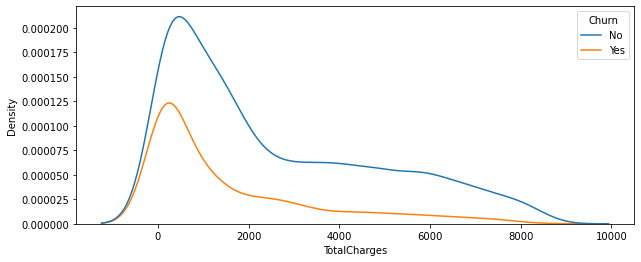

In [224]:
for col in df[numerical].columns:
    fig, ax = plt.subplots(1, 1, figsize=(10,4))
    sns.kdeplot(data=df, x=col, hue="Churn")
    # ax.set_title(col + " correlation with geek rating")
    plt.show()

- Those with low tenure have more chance to leave
- Those with high monthly Charges have more chance to leave

TODO in EDA: 
- Fix Skewed Column
- More EDA
- Check for more error value

EDA Analysis:
- this data is a bit imbalance
- Customer with no additional services have more chance to leave
- From the Graph we can see which one is highly correlated (positive or negative) and which one is not

# Preprocessing

In [225]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [226]:
dropped_column = ["gender", "MultipleLines", "StreamingTV", "StreamingMovies", "Churn", "MonthlyCharges",]

In [354]:
from sklearn.model_selection import train_test_split
X = df.drop(columns="Churn")
y = df["Churn"].map({'Yes':1, 'No':0})
random_state = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_state, stratify=y)

In [355]:
# define categorical and numerical data
categorical = X_train.select_dtypes(["object"]).columns.to_list()
numerical = [i for i in X_train if i not in categorical]

In [356]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# define one hot encode and standardscaker
onehot_encoder = OneHotEncoder()
scaler = StandardScaler()

# fit transform
categorical_train = onehot_encoder.fit_transform(X_train[categorical].astype(str)).toarray()
categorical_train = pd.DataFrame(categorical_train, columns=onehot_encoder.get_feature_names_out())

categorical_test = onehot_encoder.transform(X_test[categorical].astype(str)).toarray()
categorical_test = pd.DataFrame(categorical_test, columns=onehot_encoder.get_feature_names_out())

numerical_train = scaler.fit_transform(X_train[numerical])
numerical_train = pd.DataFrame(numerical_train, columns=numerical)

numerical_test = scaler.transform(X_test[numerical])
numerical_test = pd.DataFrame(numerical_test, columns=numerical)

# concatenate 
X_train = pd.concat((categorical_train, numerical_train), axis=1)
X_test = pd.concat((categorical_test, numerical_test), axis=1)
X_train.shape


(4922, 45)

In [357]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

Text(0.5, 0, 'Random Forest Feature Importances')

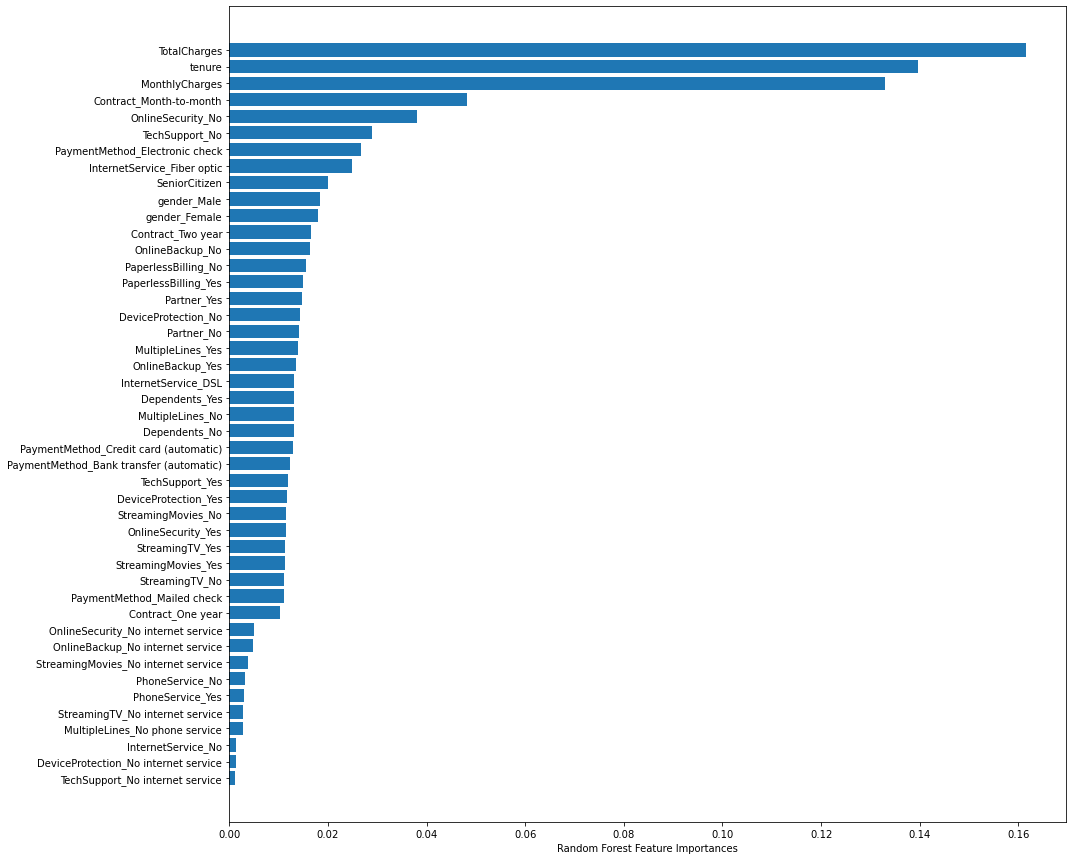

In [358]:
from sklearn.ensemble import RandomForestClassifier
rnf= RandomForestClassifier(n_estimators=100)
rnf.fit(X_train, y_train)

plt.figure(figsize=(15,15))

sorted_idx= rnf.feature_importances_.argsort()
plt.barh(X_train.columns[sorted_idx], rnf.feature_importances_[sorted_idx])
plt.xlabel('Random Forest Feature Importances')

In [359]:
X_train= X_train[X_train.columns[sorted_idx[-14:]]]
X_test= X_test[X_test.columns[sorted_idx[-14:]]]

In [378]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Activation
from tensorflow import keras
# define model
model = Sequential([
    Dense(16, input_shape=(14,), activation=None, kernel_initializer=keras.initializers.GlorotNormal(seed=123)),
    BatchNormalization(),
    Activation('relu'),
    Dense(8, activation=None, kernel_initializer=keras.initializers.GlorotNormal(seed=123)),
    BatchNormalization(),
    Activation('relu'),
    Dense(1, activation='sigmoid')
])

In [379]:
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tqdm.keras import TqdmCallback

tf.keras.backend.clear_session()
optimizer = Adam(0.001)
# tqdm = TqdmCallback(verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, cooldown=1,
                              patience=3, min_lr=0.00001)

In [380]:
# compile model 
model.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

In [381]:
# model fit
batch_size = 5
epochs = 50
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test), verbose=1, callbacks=[reduce_lr])

Epoch 1/50
985/985 [==============================] - 7s 6ms/step - loss: 0.5471 - accuracy: 0.7208 - val_loss: 0.4530 - val_accuracy: 0.7839
Epoch 2/50
985/985 [==============================] - 6s 6ms/step - loss: 0.4787 - accuracy: 0.7659 - val_loss: 0.4426 - val_accuracy: 0.7844
Epoch 3/50
985/985 [==============================] - 6s 6ms/step - loss: 0.4683 - accuracy: 0.7718 - val_loss: 0.4399 - val_accuracy: 0.7896
Epoch 4/50
985/985 [==============================] - 6s 6ms/step - loss: 0.4642 - accuracy: 0.7733 - val_loss: 0.4372 - val_accuracy: 0.7919
Epoch 5/50
985/985 [==============================] - 6s 6ms/step - loss: 0.4680 - accuracy: 0.7743 - val_loss: 0.4352 - val_accuracy: 0.7957
Epoch 6/50
985/985 [==============================] - 6s 6ms/step - loss: 0.4614 - accuracy: 0.7769 - val_loss: 0.4352 - val_accuracy: 0.7938
Epoch 7/50
985/985 [==============================] - 6s 6ms/step - loss: 0.4620 - accuracy: 0.7779 - val_loss: 0.4316 - val_accuracy: 0.7934
Epoch 

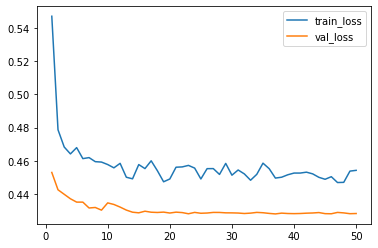

In [382]:
x_axis = np.arange(1,51)

plt.plot(x_axis, history.history['loss'], label='train_loss')
plt.plot(x_axis, history.history['val_loss'], label='val_loss')
plt.legend()